In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:/Users/Avik/Documents/PracticeAndReview/datasets/10YearBondYield.csv')
data = data.values; data # 10 Year Bond Yeild, data[0] = feb 15 2018, data[-1] = may 1 2016

array([[ 2.908],
       [ 2.833],
       [ 2.858],
       [ 2.857],
       [ 2.857],
       [ 2.828],
       [ 2.834],
       [ 2.805],
       [ 2.709],
       [ 2.845],
       [ 2.841],
       [ 2.782],
       [ 2.712],
       [ 2.724],
       [ 2.699],
       [ 2.658],
       [ 2.66 ],
       [ 2.624],
       [ 2.648],
       [ 2.617],
       [ 2.656],
       [ 2.663],
       [ 2.661],
       [ 2.624],
       [ 2.587],
       [ 2.539],
       [ 2.552],
       [ 2.55 ],
       [ 2.537],
       [ 2.559],
       [ 2.551],
       [ 2.48 ],
       [ 2.476],
       [ 2.476],
       [ 2.453],
       [ 2.445],
       [ 2.462],
       [ 2.405],
       [ 2.405],
       [ 2.434],
       [ 2.413],
       [ 2.474],
       [ 2.492],
       [ 2.485],
       [ 2.484],
       [ 2.497],
       [ 2.459],
       [ 2.394],
       [ 2.369],
       [ 2.351],
       [ 2.351],
       [ 2.349],
       [ 2.348],
       [ 2.403],
       [ 2.39 ],
       [ 2.385],
       [ 2.378],
       [ 2.362],
       [ 2.34 

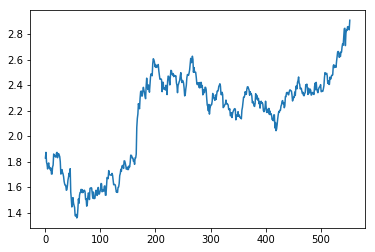

In [3]:
import matplotlib.pyplot as plt
data = data[::-1] # To get order of days correct
plt.plot(data)
plt.show()

Let's take a slice from where it dips down near '180' until where it falls at around '430'

Looking at the raw data, seems like the values to match up are 1.778, and 2.042

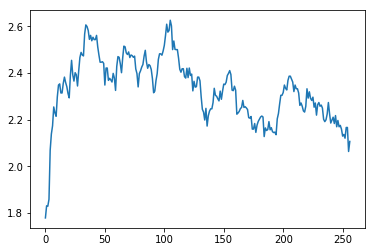

In [4]:
start = np.argwhere(data == 1.778)
end = np.argwhere(data == 2.042)
dataSlice = data[start[0][0]:end[0][0]]
plt.plot(dataSlice)
plt.show()

Looks good; let's run simulated annealing to find the maximum. I'm curios to see how much the near-global-max at around index '40' confuses/tricks the algorithm.

In [5]:
import scipy
import scipy.optimize
#import scipy.optimize.anneal # This is deprecated, told to use 'basinhopping' instead

In [6]:
from scipy.optimize import basinhopping

# Simply going to optimize the value in the data - we cast input to an int, so we're already taking some liberties
fn = lambda x: 5-(dataSlice[int(x)][0]) # use 5 minus so that higher values correspond to lower cost

# Let's initalize at 50 and see what happens
x0 = 50

# Let's try 200 iterations
niter = 200

# Let's minimize using BFGS - it's a hill climb method, so it may not work great
minimizer_kwargs = {"method": "BFGS"}


hopper = basinhopping(func=fn, niter=200, x0=x0, minimizer_kwargs=minimizer_kwargs)

In [7]:
print(hopper.x, dataSlice[int(hopper.x)])

[ 45.87706396] [ 2.477]


It doesn't move very far.

In [9]:
hopper = basinhopping(func=fn, niter=200, x0=75, minimizer_kwargs=minimizer_kwargs)

In [10]:
print(hopper.x, dataSlice[int(hopper.x)])

[ 84.53022574] [ 2.497]


It moves a little bit, but not by much - the documentation says that stepsize will find a good value if we choose a large enough number of iterations - let's try 100x what we were using.

I tried that, and due to my hard-coding of a function based on a dataset, it gets index-out-of-bounds. Let's manually set step-size instead.

In [12]:
# Let's record a number of results, and see how frequently they occur

res = np.zeros((300,2))
for k in range(300):
    hopper = basinhopping(func=fn, niter=300, x0=75, minimizer_kwargs=minimizer_kwargs, stepsize=5)
    res[k,0] = int(hopper.x)
    res[k,1] = dataSlice[int(hopper.x)]
#    ax.plot(dataSlice);
#    plt.show();
#    plt.clf();
    
uniqueResults = np.unique(res[:,0])
for k in range(len(uniqueResults)):
    print(uniqueResults[k], np.count_nonzero(res == uniqueResults[k]))
    

-152.0 1
34.0 95
35.0 5
40.0 1
41.0 1
42.0 1
102.0 25
103.0 2
104.0 1
105.0 164
106.0 4


Success! We can tell by these numbers that the vast majority of the time (260/300) we're finding the global max at 105, or the near global max at 34!

Given that I wrote this in all of 15 minutes, a better example using some fine-tuning and an acutal continous function could probably produce some really insightful results

Humourously, we get an index of -152 once, which python is actually ok with, interpreting as the 152nd-from-last entry.

In [14]:
dataSlice.shape[0] - 152

105